# Visualize predictors by timepoints

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

plt.style.use("huddlej")

In [2]:
!pwd

/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses


In [3]:
df = pd.read_table("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/tip_attributes.tsv")

In [4]:
#df = pd.read_table("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/standardized_tip_attributes.tsv")

In [5]:
df["timepoint"] = pd.to_datetime(df["timepoint"])

In [6]:
df.head()

,strain,branch_length,cTiter,cTiterSub,cTiterSub_x,clade_membership,clock_length,country,country_entropy,dTiter,...,numdate,raw_date,rb,region,region_entropy,is_terminal,timepoint,lineage,segment,frequency
0,A/Argentina/7646/2009,0.002850,1.567170,1.007868,0.220534,"HA1:50E,HA1:140I,HA1:173Q,HA1:193F,HA1:225N,HA...",0.002850,argentina,-1.000089e-12,0,...,2009.484600,2009-06-26,1,south_america,-1.000089e-12,True,2009-10-01,h3n2,ha,0.000503
1,A/Australia/2/2009,0.002449,3.974479,3.305461,1.688161,"HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA1:158N,HA1...",0.002449,australia,-9.998669e-13,0,...,2009.539357,2009-07-16,3,oceania,-9.998669e-13,True,2009-10-01,h3n2,ha,0.000086
2,A/Australia/55/2009,0.002096,3.974479,3.305461,1.688161,"HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA1:158N,HA1...",0.002096,australia,-1.000089e-12,0,...,2009.577687,2009-07-30,3,oceania,-1.000089e-12,True,2009-10-01,h3n2,ha,0.000246
3,A/Bangladesh/7772/2009,0.001145,2.467677,3.305461,1.501447,"HA1:50E,HA1:140I,HA1:158N,HA1:173Q,HA1:189K,HA...",0.001145,bangladesh,-1.000089e-12,0,...,2009.350445,2009-05-08,3,south_asia,-1.000089e-12,True,2009-10-01,h3n2,ha,0.000002
4,A/Brazil/1814/2009,0.003287,2.467676,1.007868,0.754731,"HA1:50E,HA1:140I,HA1:173Q,HA1:193F,HA1:225N,HA...",0.003287,brazil,-1.000089e-12,0,...,2009.358658,2009-05-11,1,south_america,-1.000089e-12,True,2009-10-01,h3n2,ha,0.000001


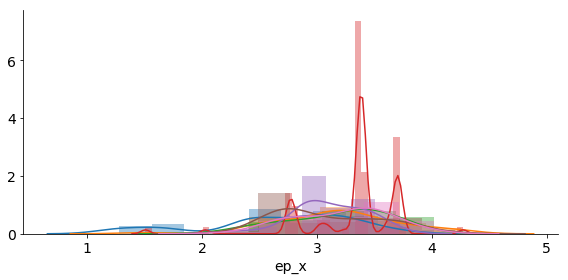

In [7]:
g = sns.FacetGrid(df, hue="timepoint", height=4, aspect=2., legend_out=True)
g = g.map(sns.distplot, "ep_x")

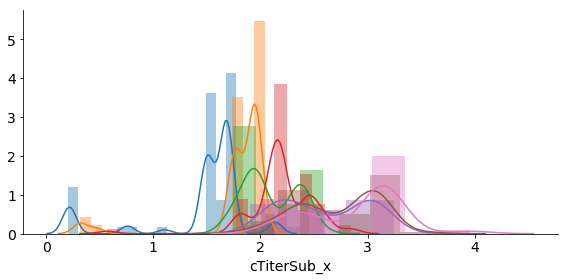

In [8]:
g = sns.FacetGrid(df, hue="timepoint", height=4, aspect=2., legend_out=True)
g = g.map(sns.distplot, "cTiterSub_x")

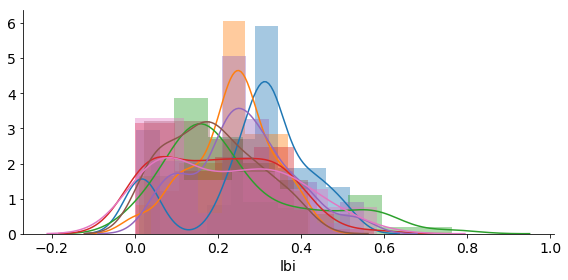

In [9]:
g = sns.FacetGrid(df, hue="timepoint", height=4, aspect=2., legend_out=True)
g = g.map(sns.distplot, "lbi")

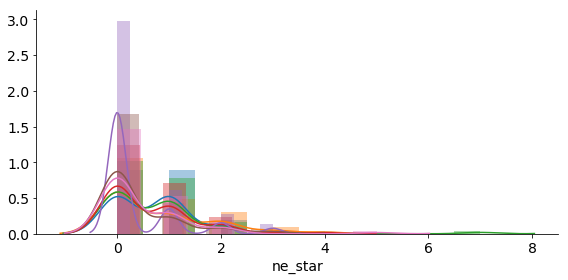

In [10]:
g = sns.FacetGrid(df, hue="timepoint", height=4, aspect=2., legend_out=True)
g = g.map(sns.distplot, "ne_star")

In [11]:
np.log(df[df["ne_star"] > 0]["ne_star"]).value_counts()

0.000000    125
0.693147     40
1.098612      7
1.386294      3
1.945910      1
1.609438      1
Name: ne_star, dtype: int64

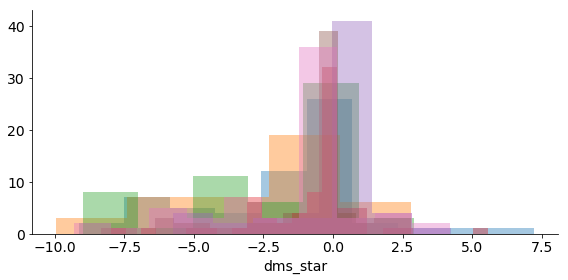

In [12]:
g = sns.FacetGrid(df[np.abs(df["dms_star"]) < 10], hue="timepoint", height=4, aspect=2., legend_out=True)
g = g.map(sns.distplot, "dms_star", kde=False)

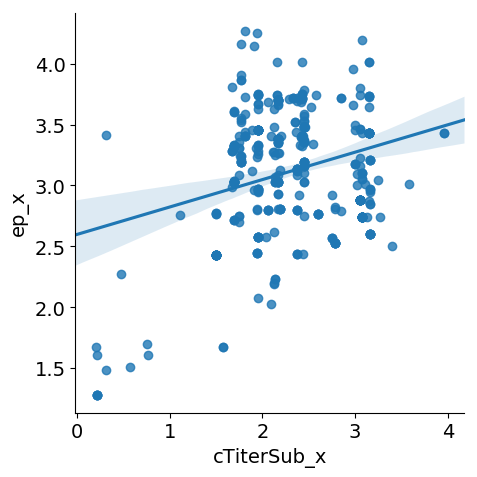

In [18]:
sns.lmplot("cTiterSub_x", "ep_x", df)

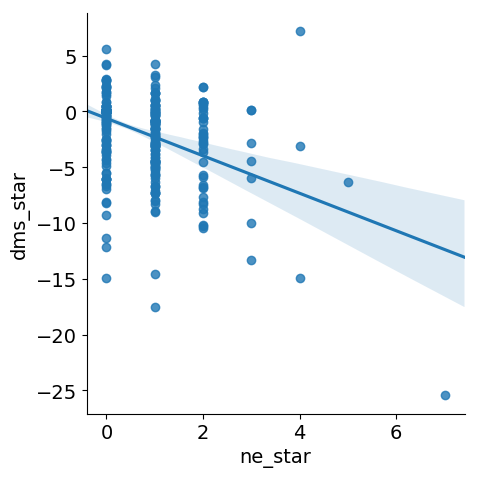

In [17]:
sns.lmplot("ne_star", "dms_star", df)

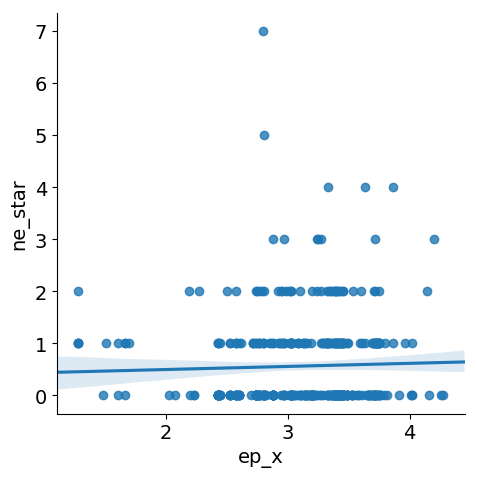

In [19]:
sns.lmplot("ep_x", "ne_star", df)

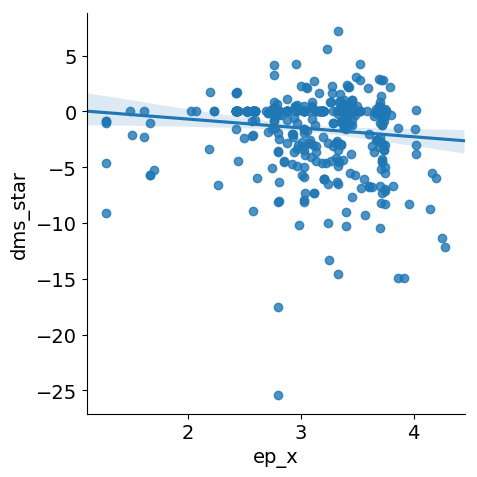

In [20]:
sns.lmplot("ep_x", "dms_star", df)

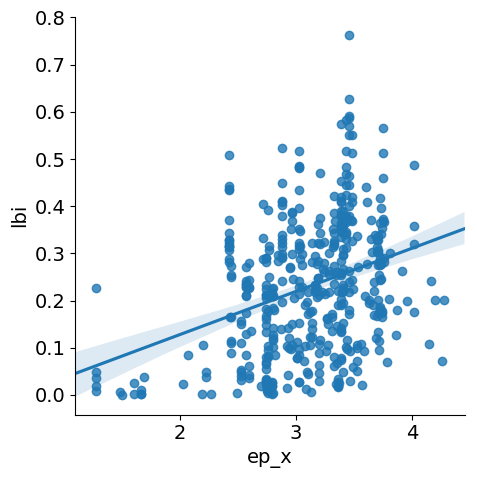

In [21]:
sns.lmplot("ep_x", "lbi", df)

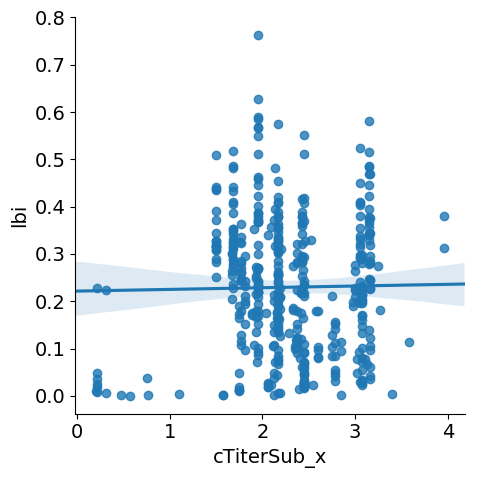

In [22]:
sns.lmplot("cTiterSub_x", "lbi", df)

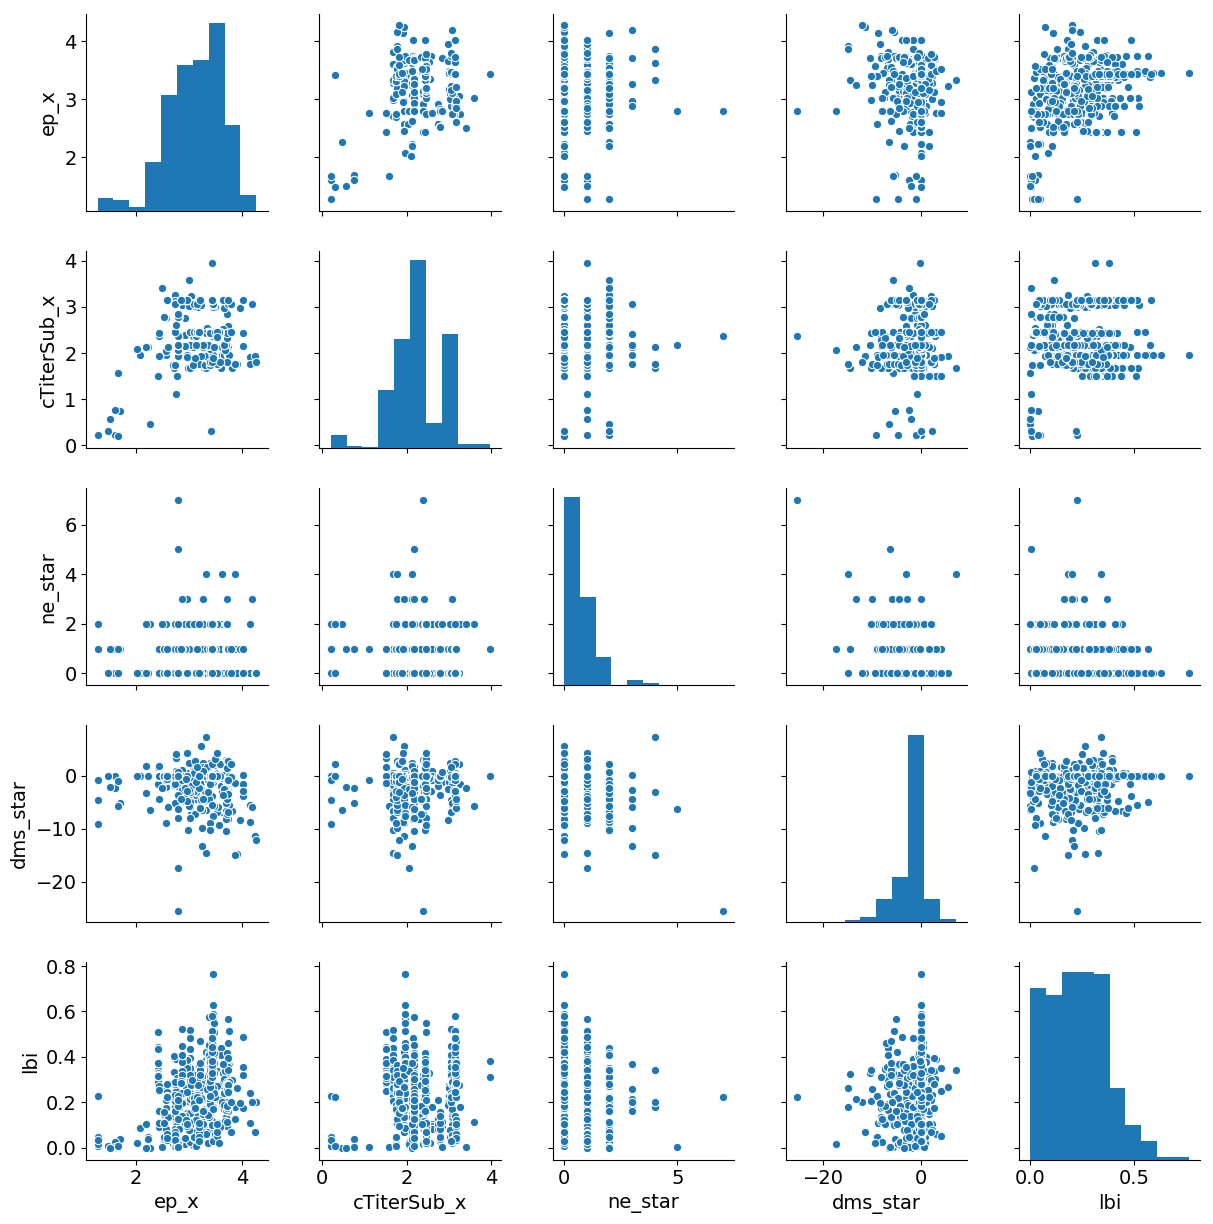

In [28]:
sns.pairplot(df.loc[:, ["ep_x", "cTiterSub_x", "ne_star", "dms_star", "lbi"]].dropna())

In [25]:
df.loc[:, ["ep_x", "cTiterSub_x", "ne_star", "dms_star", "lbi"]].shape

(455, 5)

In [27]:
df.loc[:, ["ep_x", "cTiterSub_x", "ne_star", "dms_star", "lbi"]].dropna().shape

(443, 5)